In [1]:
from scipy.stats import norm
import numpy as np
import pandas as pd
from datetime import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import math
import random

#Number 1
mean = 100
std = 50
#Part a
print("Part 1a:", norm.cdf(1.78))
#Part b
print("Part 1b:", 1 - norm.cdf(-0.54))
#Part c
z = (80-100)/50
print("Part 1c:", 1 - norm.cdf(z))
#Part d
z1 = (65-100)/50
z2 = (83-100)/50
print("Part 1d:", norm.cdf(z2) - norm.cdf(z1))

Part 1a: 0.9624620196514833
Part 1b: 0.705401483784302
Part 1c: 0.6554217416103242
Part 1d: 0.1249646117408989


In [2]:
#Number 3
#Approximation
p = 0.7
q = 0.3
u = 1.005
d = 0.994
mean = 0.7
std = np.sqrt(p*q)
n = 252
r1 = 174
r2 = 101

z1 = ((r1/n) - mean)/(std/np.sqrt(n))
z2 = ((r2/n) - mean)/(std/np.sqrt(n))

a1 = norm.cdf(z1)
a2 = norm.cdf(z2)
print("Question 3:")
print("Approximate value:", a1 - a2)

#Exact
summation1 = 0
temp = 0
for i in range(r1+1, n+1):
    combination = (math.factorial(n)) / (math.factorial(i)*math.factorial(n-i))
    temp = combination*(p**i)*(q**(n-i))
    summation1 += temp

summation2 = 0
temp = 0
for i in range(r2, n+1):
    combination = (math.factorial(n)) / (math.factorial(i)*math.factorial(n-i))
    temp = combination*(p**i)*(q**(n-i))
    summation2 += temp
    
print("Exact value:", summation2 - summation1)

Question 3:
Approximate value: 0.3707323063164889
Exact value: 0.3937178191670707


Question 4a:
Daily mean return: 0.003597817438545137
Annual mean return: 0.9066499945133745
Question 4b:
Daily standard deviation of returns: 0.04103006624222502
Annual standard deviation of returns: 0.6513321093206031
Question 4c:


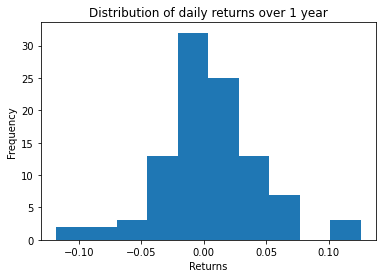

Question 4d:


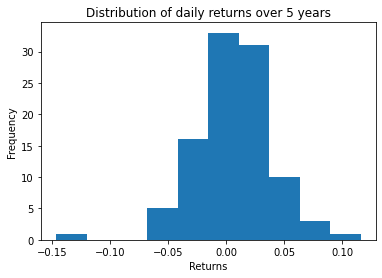

In [3]:
#Number 4
amd = web.DataReader("AMD", "yahoo", datetime(2016,1,1), datetime(2021,1,1))
stockPrice = amd["Adj Close"]

#For daily returns
dailyReturnsMean = stockPrice.pct_change()[1:].mean()
dailyReturnsSTD = stockPrice.pct_change()[1:].std()

#For annual returns
annualReturnsMean = stockPrice.pct_change()[1:].mean()*252.0
annualReturnsSTD = stockPrice.pct_change()[1:].std()*np.sqrt(252.0)

#Part a
print("Question 4a:")
print("Daily mean return:", dailyReturnsMean)
print("Annual mean return:", annualReturnsMean)

#Part b
print("Question 4b:")
print("Daily standard deviation of returns:", dailyReturnsSTD)
print("Annual standard deviation of returns:", annualReturnsSTD)

#Part c
#Looks like a normal distribution
print("Question 4c:")
amd1 = web.DataReader("AMD", "yahoo", datetime(2020,1,1), datetime(2021,1,1))
stockPrice1 = amd1["Adj Close"]
dailyReturns1 = stockPrice1.pct_change()[1:]

randomDraws1 = []
seen1 = []
count = 0
while count < 100:
  temp = random.randrange(0, len(dailyReturns1) - 1)
  if temp not in seen1:
    randomDraws1.append(dailyReturns1[temp])
    seen1.append(temp)
    count += 1

plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title("Distribution of daily returns over 1 year")
plt.hist(randomDraws1)
plt.show()

#Part d
print("Question 4d:")
amd2 = web.DataReader("AMD", "yahoo", datetime(2016,1,1), datetime(2021,1,1))
stockPrice2 = amd2["Adj Close"]
dailyReturns2 = stockPrice2.pct_change()[1:]

randomDraws2 = []
seen2 = []
count = 0
while count < 100:
  temp = random.randrange(0, len(dailyReturns2) - 1)
  if temp not in seen2:
    randomDraws2.append(dailyReturns2[temp])
    seen2.append(temp)
    count += 1

plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title("Distribution of daily returns over 5 years")
plt.hist(randomDraws2)
plt.show()

Question 4e:


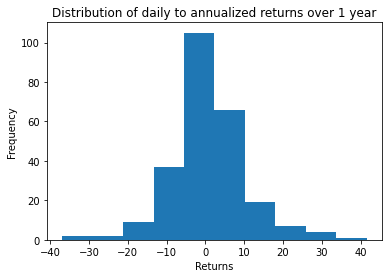

Question 4f: 0.17434520313751345
Question 4g: 0.1611


In [5]:
#Part e
daily_to_annualReturns = []
for i in dailyReturns1:
  temp = (i)*252.00
  daily_to_annualReturns.append(temp)

print("Question 4e:")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title("Distribution of daily to annualized returns over 1 year")
plt.hist(daily_to_annualReturns)
plt.show()

#Part f
z = ((-0.1/20) - dailyReturnsMean)/(dailyReturnsSTD/np.sqrt(20))
prob = norm.cdf(z)
print("Question 4f:", prob)

#Part g
amd = web.DataReader("AMD", "yahoo", datetime(2016,1,1), datetime(2021,1,1))
stockPrice = amd["Adj Close"]
dailyReturns = stockPrice.pct_change()[1:]

count = 0
for i in range(100000):
  rep = 0
  randomSelection = []
  seen = []
  while rep < 20:
    temp = random.randrange(0, len(dailyReturns) - 1)
    if temp not in seen:
      randomSelection.append(dailyReturns[temp])
      seen.append(temp)
      rep += 1
  if np.sum(randomSelection) <= -0.1:
    count += 1

print("Question 4g:", count/100000)